<left><img width=25% src="img/cornell_tech2.svg"></left>

# Lecture 19: Dimensionality Reduction

### Applied Machine Learning

__Volodymyr Kuleshov__<br>Cornell Tech

# Part 1: What is Dimensionality Reduction?

Dimensionality reduction is another important unsupervised learning problem with many applications.

We will start by defining the problem and providing some examples.

# Review: Unsupervised Learning

We have a dataset *without* labels. Our goal is to learn something interesting about the structure of the data:
* Clusters hidden in the dataset.
* Outliers: particularly unusual and/or interesting datapoints.
* Useful signal hidden in noise, e.g. human speech over a noisy phone.

# Dimensionality Reduction:  Examples

Consider a dataset $\mathcal{D} = \{x^{(i)} \mid i = 1,2,...,n\}$ of motorcylces, characterized by a set of attributes.
* Attributes include size, color, maximum speed, etc.
* Suppose that two attributes are closely correlated: e.g., $x^{(i)}_j$ is the speed in `mph` and $x^{(i)}_k$ is the speed in `km/h`.
* The real dimensionality of the data is $d-1$!

We would like to automatically identify the right data dimensionality.

Another example can be obtained on the Iris flower dataset.

In [3]:
# import standard machine learning libraries
import numpy as np
import pandas as pd
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()

Consider the petal length and the petal width of the flowers: they are closely correlated.

This suggests that we may reduce the dimensionality of the problem to one dimension: petal size.

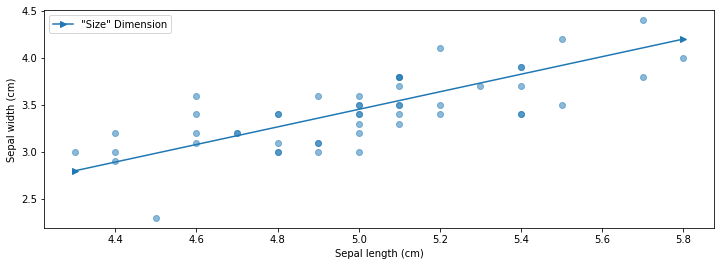

In [4]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

# Visualize the Iris flower dataset
setosa_flowers = (iris.target == 0)
plt.scatter(iris.data[setosa_flowers,0], iris.data[setosa_flowers,1], alpha=0.5)
plt.plot([4.3, 5.8], [2.8, 4.2], '->')
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.legend(['"Size" Dimension'])

# Dimensionality Reduction

More generally, a dimensionality reduction algorithm learns from data an unsupervised model
$$f_\theta : \mathcal{X} \to \mathcal{Z},$$
where $\mathcal{Z}$ is a low-dimensional representation of the data.

For each input $x^{(i)}$, $f_\theta$ computes a low-dimensional representation $z^{(i)}$.

# Linear Dimensionality Reduction

Suppose $\mathcal{X} = \mathbb{R}^d$ and $\mathcal{Z} = \mathbb{R}^p$ for some $p < d$. The transformation 
$$f_\theta : \mathcal{X} \to \mathcal{Z}$$
is a linear function with parameters $\theta = W \in \mathbb{R}^{d \times p}$ that is defined by
$$ z = f_\theta(x) = W^\top \cdot x. $$
The latent dimension $z$ is obtained from $x$ via a matrix $W$.

# Example: Discovering Structure in Digits

Dimensionality reduction can reveal interesting structure in digits without using labels.

<center><img width=50% src="img/aae_dim_reduc_2.png"></center>

# Example: DNA Analysis

Even linear dimensionality reduction is powerful. Here, in uncovers the geography of European countries from only DNA data

<center><img width=50% src="img/dna_map.jpg"></center>

# Other Kinds of Dimensionality Reduction

We will focus on linear dimensionality reduction this lecture, but there exist many other methods:
* Non-linear methods based on kernels (e.g., Kernel PCA)
* Non-linear methods based on deep learning (e.g., variational autoencoders)
* Non-linear methods based on maximizing signal independence (independent component analysis)
* Probabilistic versions of the above


See the `scikit-learn` [guide](https://scikit-learn.org/stable/modules/unsupervised_reduction.html) for more!

<left><img width=25% src="img/cornell_tech2.svg"></left>
# Part 2: Principal Component Analysis

We will now describe principal component analysis (PCA), one of the most widely used algorithms for dimensionality reduction.

# Components of an Unsupervised Learning Problem

At a high level, an unsupervised machine learning problem has the following structure:

$$ \underbrace{\text{Dataset}}_\text{Attributes} + \underbrace{\text{Learning Algorithm}}_\text{Model Class + Objective + Optimizer } \to \text{Unsupervised Model} $$

The dataset $\mathcal{D} = \{x^{(i)} \mid i = 1,2,...,n\}$ does not include any labels.

# Review: Linear Dimensionality Reduction

Suppose $\mathcal{X} = \mathbb{R}^d$ and $\mathcal{Z} = \mathbb{R}^p$ for some $p < d$. The transformation 
$$f_\theta : \mathcal{X} \to \mathcal{Z}$$
is a linear function with parameters $\theta = W \in \mathbb{R}^{d \times p}$ that is defined by
$$ z = f_\theta(x) = W^\top x. $$
The latent dimension $z$ is obtained from $x$ via a matrix $W$.

# Principal Components Model

Principal component analysis (PCA) assumes that 
* Datapoints $x \in \mathbb{R}^{d}$ live close to a low-dimensional subspace $\mathcal{Z} = \mathbb{R}^p$ of dimension $p<d$
* The subspace $\mathcal{Z} = \mathbb{R}^p$ is spanned by a set of orthonormal vectors $w^{(1)}, w^{(2)}, \ldots, w^{(p)}$
* The data $x$ are approximated by a linear combination $\tilde x$ of the $w^{(k)}$
$$ x \approx \tilde x = \sum_{k=1}^p w^{(k)} z_k = W z $$
for some $z \in \mathcal{X}$ that are the coordinates of $\tilde x$ in the basis $W$.

In this example, the data lives in a lower-dimensional 2D plane within a 3D space (image [credit](https://doc.plob.org/machine_learning/14_Dimensionality_Reduction.html)).

<center><img width=50% src="img/pca_example_plane.png"></center>

We can choose a basis $W$ for this plane. The coordinates in this basis are denoted by $z$ (image [credit](https://doc.plob.org/machine_learning/14_Dimensionality_Reduction.html)).

<center><img width=80% src="img/pca_example.png"></center>

The model for PCA is a function $f_\theta$ of the form
$$ z = f_\theta(x) = W^\top x, $$
where $\theta = W$ and $W$ is a $d \times p$ matrix of $p$ orthonormal column vectors denoted as $w^{(1)}, w^{(2)}, \ldots, w^{(p)}$.

This model enables performing two tasks:
* __Encoding__: $z = W^\top x$, finding the low-dimensional representation of input $x$
* __Decoding__: $\tilde x = W  z$, converting a low-dimensional $z$ to a high-dimensional representation $x$

# PCA Objective: Reconstruction

How do we find a good subpace $\mathcal{Z}$ as defined by a set of orthonormal vectors $W$?

A natural objective is to minimize the reconstruction error
$$J_1(W) = \sum_{i=1}^n \| x^{(i)} - \tilde x^{(i)} \|_2^2 =\sum_{i=1}^n \| x^{(i)} - W W^\top x^{(i)} \|_2^2$$
between each input $x^{(i)}$ and its approximate reconstruction $$\tilde x^{(i)} = W \cdot z^{(i)} = W\cdot W^\top \cdot x^{(i)}.$$

In this example, if the points don't lie perfectly on a plane, we choose the plane such that the points' distance to it is minimized (image [credit](https://doc.plob.org/machine_learning/14_Dimensionality_Reduction.html)).

<center><img width=80% src="img/pca_example.png"></center>

# PCA Objective: Maximizing Variance

An alternative objective for learning a PCA model is maximizing variance. 

We start with some intuition. Consider the Iris flower we have seen earlier.

Below, we can project the data along the blue line or the orange line.

The blue line is better because it captures the shape of the data and can be naturally interpreted as "sepal size".

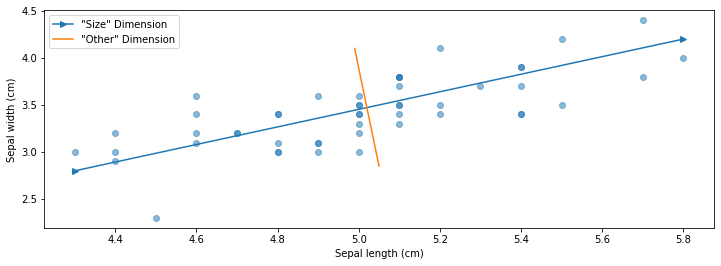

In [5]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

# Visualize the Iris flower dataset
setosa_flowers = (iris.target == 0)
plt.scatter(iris.data[setosa_flowers,0], iris.data[setosa_flowers,1], alpha=0.5)
plt.plot([4.3, 5.8], [2.8, 4.2], '->')
plt.plot([5.05, 4.99], [2.85, 4.1])
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.legend(['"Size" Dimension', '"Other" Dimension'])

How do we automatically identify such natural directions of variation in the data? Consider the following dataset (image by [Andrew Ng](http://cs229.stanford.edu/)).

<center><img width=45% src="img/pca_projection_data.png"></center>

One way to reduce the dimensionality of this dataset from is to project it along the following line.
<center><img width=50% src="img/pca_projection1.png"></center>
Projected data is tightly clustered around its mean. It has *low variance*.

An alternative projection is along the following line. Data is much more spread out: it has *high variance* around its mean.
<center><img width=50% src="img/pca_projection2.png"></center>
Our goal is to identify this direction automatically.

We may formalize this as follows. 
* Let $\hat{\mathbb{E}}[f(x)]$ denote empirical expectation for any $f$:
$$\hat{\mathbb{E}}[f(x)] = \frac{1}{n}\sum_{i=1}^n f(x^{(i)}). $$

* Assume that we have centered the data, i.e.
$$\hat{\mathbb{E}}[x] = 0 \text{ and thus } \hat{\mathbb{E}}[W^\top x] = W^\top \hat{\mathbb{E}}[x] = 0.$$
<!-- $$\frac{1}{n}\sum_{i=1}^n x^{(i)} = 0 \text{ and thus } \frac{1}{n}\sum_{i=1}^n W^\top x^{(i)} = 0.$$ -->

* The the variance of the projected data is
\begin{align*}
\hat{\mathbb{E}}\left[ \| z - \hat{\mathbb{E}}[z] \|^2 \right] =
\hat{\mathbb{E}}\left[ \| W^\top x - \hat{\mathbb{E}}[W^\top x] \|^2 \right] 
& = \hat{\mathbb{E}}\left[ \| W^\top x \|^2 \right]
\end{align*}
<!-- \begin{align*}
\frac{1}{n} \sum_{i=1}^n \| W^\top x^{(i)} - \frac{1}{n}\sum_{i=1}^n x^{(i)} \|_2^2
& = \frac{1}{n} \sum_{i=1}^n \| W^\top x^{(i)}\|_2^2
\end{align*} -->

Thus, the variance objective is simply
$$J_2(W) = \hat{\mathbb{E}}\left[ \| W^\top x \|^2 \right] = \frac{1}{n} \sum_{i=1}^n \| W^\top x^{(i)}\|_2^2.$$

# Equivalence Between PCA Objectives

It turns out that minimizing reconstruction error and maximizing variance are equivalent.
$$\arg\min_W J_1(W) = \arg\max_W J_2(W).$$

This image by [Alex Williams](http://alexhwilliams.info/itsneuronalblog/2016/03/27/pca/) provides intuition.

<center><img width=80% src="img/pca_two_views.png"></center>

Consider the operator $W W^\top x$. We can decompose any $x$ into a sum of two orthoginal vectors:
\begin{align*}
x 
& = x + W W^\top x - W W^\top x \\
& = \underbrace{W W^\top x}_\text{projected data $\tilde x$ (D1)} + \underbrace{(I - W W^\top) x}_\text{difference between datapoint $x$ and $\tilde x$ (D2)}
\end{align*}

<center><img width=50% src="img/pca_decomposition.png"></center>

We can compute the norm of both sides to obtain
\begin{align*}
\|x\|_2^2
& = \| W W^\top x + (I - W W^\top) x \|_2^2 \\
& = \|W W^\top x\|_2^2 + \|(I - W W^\top) x\|_2^2 \\
& = \|W^\top x\|_2^2 + \|(I - W W^\top) x\|_2^2
\end{align*}
* In the second line we used the fact that $W W^\top x$ and $(I - W W^\top) x$ are orthogonal (easy to check) 
* In the third line we used that $\|W a\| = \|a\|$ for any vector $a$ and orthogonal matrix $W$.

Thus we find that
\begin{align*}
J_1(W) & = \sum_{i=1}^n \|(I - W W^\top) x^{(i)}\|_2^2 \\
& = \sum_{i=1}^n \left( \|x^{(i)}\|_2^2 - \|W^\top x^{(i)}\|_2^2 \right) \\
&= - n\cdot J_2(W) + \text{const.}
\end{align*}
and minimizing the reconstruction objective $J_1$ is the same as maximizing the variance objective $J_2$.

# Finding Principal Components

Next, how do we optmimize either of these objectives? Let's look at the variance objective $J_2$, which we can write as:
\begin{align*}
J_2(W)
& = \frac{1}{n}  \sum_{i=1}^n \| W^\top x^{(i)}\|_2^2 = \frac{1}{n}  \sum_{i=1}^n \sum_{j=1}^p ((w^{(j)})^\top x^{(i)})^2
\end{align*}
where $w^{(j)}$ is the $j$-th column of $W$ and $\hat\Sigma = \frac{1}{n} \sum_{i=1}^n \left( x^{(i)} (x^{(i)})^\top \right)$ is the empirical covariance matrix of the data.

We can further write this as:
\begin{align*}
J_2(W)
& = \frac{1}{n} \sum_{i=1}^n \| W^\top x^{(i)}\|_2^2 = \frac{1}{n} \sum_{i=1}^n \sum_{j=1}^p ((w^{(j)})^\top x^{(i)})^2 \\
& = \frac{1}{n} \sum_{i=1}^n \sum_{j=1}^p \left((w^{(j)})^\top x^{(i)}\right) \cdot \left((x^{(i)})^\top w^{(j)}\right)  \\
& = \sum_{j=1}^p (w^{(j)})^\top \cdot \left( \frac{1}{n}  \sum_{i=1}^n x^{(i)} (x^{(i)})^\top \right) \cdot w^{(j)}\\
& = \sum_{j=1}^p (w^{(j)})^\top \cdot \hat\Sigma \cdot w^{(j)},
\end{align*}
where $\hat\Sigma = \frac{1}{n} \sum_{i=1}^n \left( x^{(i)} (x^{(i)})^\top \right)$ is the empirical covariance matrix of $\mathcal{D}$.

Recall that the positive semidefinite matrix $\hat \Sigma$ has an *eigendecomposition*
$$\hat \Sigma = Q \Lambda Q^\top = \sum_{j=1}^d \lambda_j q^{(j)} (q^{(j)})^\top. $$
* $Q$ is a matrix whose columns are orthonormal eigenvectors $q^{(j)}$ for $j = 1,2,\ldots,d$.
* $\Lambda$ is a diagonal matrix of positive eigenvalues $\lambda_1 \geq \lambda_2 \geq \ldots \geq \lambda_d$.

Consider our optimization problem for $p=1$:
$$J(w) = w^\top \cdot \hat\Sigma \cdot w.$$
How do we find the best projection vector $w$?

Using the eigendecomposition, we can write this as:
$$J(w) = w^\top \cdot Q \Lambda Q^\top \cdot w = \sum_{j=1}^d \lambda_j (w^\top q^{(j)})^2.$$

The optimal solution to
$$\max_w J(w) = \max_w \sum_{j=1}^d \lambda_j (w^\top q^{(j)})^2$$
is attained by the top eigenvector $w = q^{(1)}$. The optimum is $J( q^{(1)}) = \lambda_1$.

* Let $a_j = (w^\top q^{(j)})^2$ and note that $\sum_j a_j^2 = ||Q w||_2^2 = 1$ because all vectors are orthonormal.
* Our objective $J(w) = \sum_{j=1}^d \lambda_j a_j^2$ is a weighted average of $\lambda_j$
* The weighted average $\sum_{j=1}^d \lambda_j a_j^2$ attains a maximum of $\lambda_1$ when all "weight" goes to $a_1=1$ and $w = q^{(1)}$.

More generally when $p>1$, our objective is
$$J(W) = \sum_{k=1}^p \sum_{j=1}^d \lambda_j ((w^{(k)})^\top q^{(j)})^2$$
where $W$ is a matrix of orthonormal columns $w^{(1)}, w^{(2)}, \ldots, w^{(p)}$.

By analogy with the previous example, 
* $J(W)$ is maximized when $w^{(1)} = q^{(1)}$, $w^{(2)} = q^{(2)}$, ..., $w^{(p)}= q^{(p)}$
* The maximum value attained is $\lambda_1 + \lambda_2 + \ldots + \lambda_p$
* We refer to
$$\frac{\lambda_1 + \lambda_2 + \ldots + \lambda_p}{\lambda_1 + \lambda_2 + \ldots + \lambda_d}$$
as the proportion of *variance explained* by the lower-dimensional projection $z = W^\top x$. When $d=p$ it is one.

# Algorithm: Principal Component Analysis

* __Type__: Unsupervised learning (dimensionality reduction)
* __Model family__: Linear projection $W^\top z$ of low-dimensional $z$
* __Objective function__: Reconstruction error or variance maximization
* __Optimizer__: Matrix eigendecomposition

# Practical Considerations

When applying PCA, the following tricks are useful.
* Before applying PCA, it is important to normalize the data to have zero mean and unit variance.
$$x_j^{(i)} \gets \frac{x_j^{(i)} - \mu_j}{\sigma_j} \text{for all $i,j$},$$
where $\mu_j, \sigma_j$ are the mean and variance along the $j$-th dimension. 
* This address scaling issues due to choice of units (`km/h` vs `cm/h`).
* In order to choose the optimal number of components, we can apply the Elbow method.

# An Example: Iris Flowers

Let's look at an example over the Iris flower dataset. In its entirety, it has four dimensions; let's visualize it in 3D by looking at the first 3 dimensions.

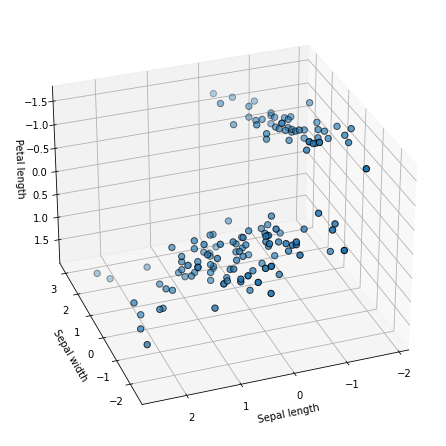

In [46]:
from mpl_toolkits.mplot3d import Axes3D

# form the design matrix and target vector
X, y = iris.data, iris.target
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# display data in 3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_zlabel("Petal length")
p1 = ax.scatter(X[:, 0], X[:, 1], X[:, 2], edgecolor='k', s=40)

We can implement PCA using a small number of `numpy` operations.

In [36]:
def pca_project(X, p=2):
    Sigma = X.T.dot(X) / X.shape[0] # form covariance matrix
    L, Q = np.linalg.eig(Sigma) # perform eigendecomposition
    W = Q[:,:p] # get top p eigenvectors
    Z = X.dot(W) # project on these eigenvectors
    return Z

Visualizing the data, we obtain the following structure.

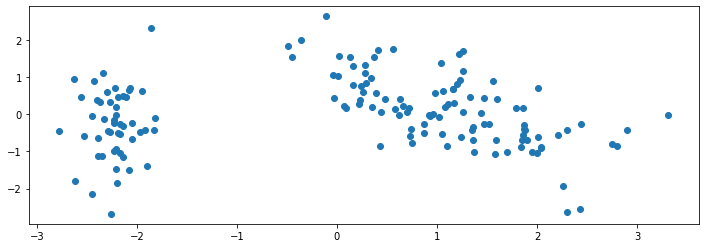

In [41]:
Z = pca_project(X, p=2)
plt.scatter(Z[:,0], Z[:,1])

We can also add labels. The classes are well-separated.

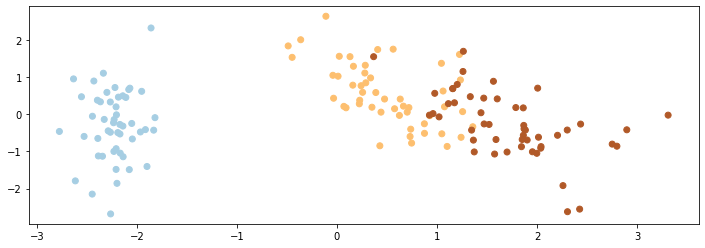

In [42]:
plt.scatter(Z[:,0], Z[:,1], c=y, cmap=plt.cm.Paired)

The separation is better than if we just chose the first two dimensions.

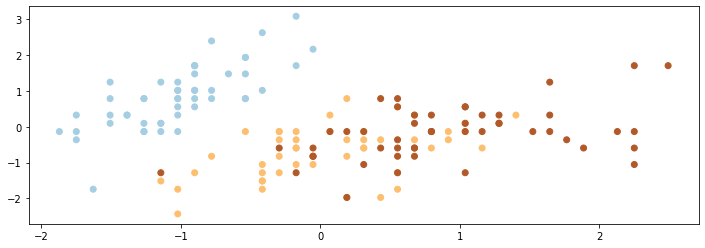

In [43]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)

We can train two classifiers on this data and compare their accuracy.

PCA dimensions result in better accuracy that just choosing the first two dimensions.

In [50]:
from sklearn.linear_model import LogisticRegression

# train softmax on non-PCA data
logreg1 = LogisticRegression(C=1e5, multi_class='multinomial')
logreg1.fit(X[:,:2], y)
print('Accuracy on first two dimensions: %.2f' % logreg1.score(X[:,:2],y))

# train softmax on PCA data
logreg2 = LogisticRegression(C=1e5, multi_class='multinomial')
logreg2.fit(Z, y)
print('Accuracy on two PCA dimensions: %.2f' % logreg2.score(Z,y))

Accuracy on first two dimensions: 0.83
Accuracy on two PCA dimensions: 0.92


# Pros and Cons of PCA

PCA is perhaps the most widely used dimensionality reduction algorithm.
* It is both highly intuitive and effective
* It is also fast and easy to implement

Its limitations include:
* Linear projections may be too limited in some applications
* Choosing the right dimension $p$ can be somewhat of an art